# PlanetGram Tutorial

This tutorial will explain how to process images in Python, to share on the hottest new social media platform for scientific developers, _PlanetGram_.

**In this guide, we will perform the following:**
1. Load a full-color image into a NumPy array. 
1. Display the image. 
1. Crop the image. 
1. Create a lower resolution thumbnail. 
1. Apply a generic color effect to the image. 
1. Apply my favorite effect to the image 😎.

## Requirements
* Python 3+
* [matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)
* [PIL](https://pypi.org/project/Pillow/)

## Step 1. Load a full-color image into a NumPy array.
There is a cool free-use image of a [Red Eyed Tree Frog from Wikipedia](https://en.wikipedia.org/wiki/File:Red_eyed_tree_frog_edit2.jpg) in the `data/` directory. 

Let's load that image into memory as a NumPy array using the PIL module. 

In [1]:
from PIL import Image
import numpy as np 

image_file = Image.open('data/red_eyed_tree_frog.jpg')

image_raster = np.array(image_file)  # 2D array of RGB tuples, indexed as [row][column]

## Step 2. Display the Image

We can use matplotlib's pyplot package to display an image, with the image name and resolution as the title. 

The resolution of our image can be found using [numpy.ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html).

Let's also define a function `display_image` so that we don't have to repeat ourselves in later steps.



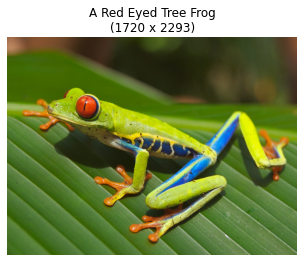

In [29]:
from matplotlib import pyplot as plt

"""Display an image in a new pyplot plot"""
def display_image(raster: np.ndarray, title: str, no_axis: bool = True): 
    plt.figure()  
    plt.title(title)
    if no_axis:
        plt.axis('off')
    plt.imshow(raster)    
    
height, width, _ = image_raster.shape
caption = f'A Red Eyed Tree Frog\n({height} x {width})'

display_image(image_raster, caption)

## Step 3. Crop The Image

Look at those big red eyes 👀! Let's crop the image into a square that focuses on this colorful frogs head. 

To do this, we'll use a PIL function [Image.crop](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop). 

The first parameter is `box - a 4-tuple defining the left, upper, right, and lower pixel coordinate.`. 

Hmm, we need to find out roughly where this box is. Let's call `display_image` with the `no_axis` as `False`, which will display the pixel dimensions as the X and Y axis. 

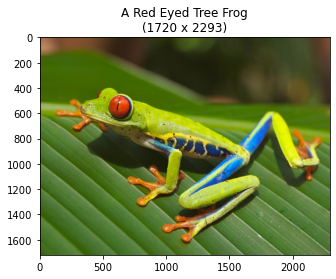

In [30]:
display_image(image_raster, caption, no_axis=False)

Great! Let's make a square with a side length of 800 pixels, starting at (200, 1000), and ending at (1000, 200).  

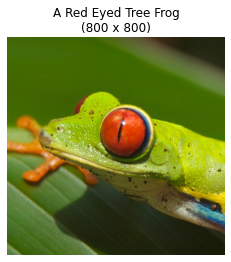

In [28]:
side_length = 800

left = 200
right = left + side_length

lower = 1000
upper = lower - side_length

box = [left, upper, right, lower]

cropped_image_file = image_file.crop(box)
cropped_image_raster = np.array(cropped_image_file)

height, width, _ = cropped_image_raster.shape
caption = f'A Red Eyed Tree Frog\n({height} x {width})'

display_image(cropped_image_raster, caption)

## Step 4. Create a Low Resolution Thumbnail